In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"D:\Others\Python Coding\IE Data.xlsx")
#print(df.head())
IElist = df['E(IE)'].tolist()

In [3]:
beta = 1/(0.001987*300)
RT = 0.001987*300
i=0
summation = 0
TdS_list = []
N_list = []
for EIE in IElist:
    i=i+1
    EIE_append = 0
    j=0
    while j<i:
        EIE_append = IElist[j] + EIE_append
        j=j+1
        
    IE_avg = EIE_append/j
    expo = np.exp((EIE-IE_avg)*beta)
    summation = summation+expo
    summation_avg = summation/i
    TdeltaS = RT*np.log(summation_avg)
    TdS_list.append(TdeltaS)
    N_list.append(i)




In [4]:
RT = 0.001987*300
RTx2 = 2*RT
i=0
TdS_list_C2 = []
N_list_C2 = []
SD_list = []
for EIE_C2 in IElist:
    SD_list.append(EIE_C2)
    i=i+1
    EIE_add = 0
    j=0
    while j<i:
        EIE_add = IElist[j] + EIE_add
        j=j+1
    IE_avg = EIE_add/j
    sum = 0
    for ele in SD_list:
        sum = sum+((ele-IE_avg)**2)
    
    SD = np.sqrt(sum/i)
    SDsq = SD**2
    TdeltaS_C2 = SDsq/RTx2
    TdS_list_C2.append(TdeltaS_C2)
    N_list_C2.append(i)


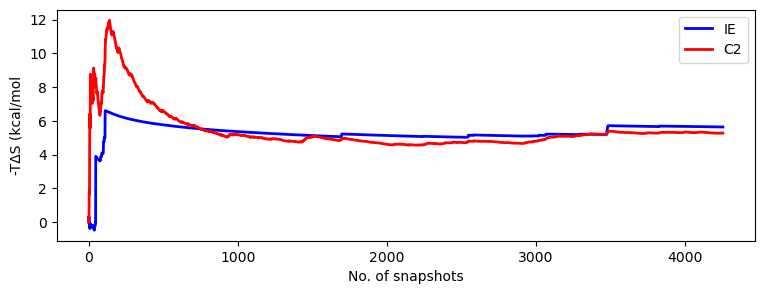

In [5]:
#plt.figure().set_figwidth(10)
#plt.figure().set_figheight(6)
plt.rcParams['figure.figsize'] = [9, 3]
plt.plot(N_list, TdS_list, color='blue', linewidth=2, label='IE')
plt.plot(N_list, TdS_list_C2, color='red', linewidth=2, label='C2')
plt.xlabel('No. of snapshots')
plt.ylabel('-TΔS (kcal/mol')
plt.legend()
plt.savefig('IEC2entropy2.png', bbox_inches='tight')
plt.show()